In [11]:
import ipytest
import random
import pytest
import math
import perfplot

ipytest.autoconfig()

## 素数判定（試し割り法）

In [2]:
%%ipytest

def is_prime(num: int) -> bool:
    if num < 2:
        return False
    for i in range(2, num):
        if num % i == 0:
            return False
    return True

@pytest.mark.parametrize("num, expected", [
    (3, True),
    (8, False),
    (13, True),
    (20, False),
    (1, False),
    (0, False),
])

def test_is_prime(num, expected):
    assert is_prime(num) == expected

......                                                                                       [100%]
6 passed in 0.06s


## エラトステネスのふるい

最適化を行った試し割り法

In [3]:
%%ipytest

def is_prime_opt(num: int) -> bool:
    if num < 2: return False
    if num == 2: return True
    if num % 2 == 0: return False

    square_root = math.ceil(math.sqrt(num)) # 平方根を求める（切り上げ）
    for i in range(3, square_root + 1, 2):
        if num % i == 0:
            return False
    return True

@pytest.mark.parametrize("num, expected", [
    (3, True),
    (8, False),
    (13, True),
    (20, False),
    (1, False),
    (0, False),
])

def test_is_prime_opt(num, expected):
    assert is_prime_opt(num) == expected

......                                                                                       [100%]
6 passed in 0.04s


Output()

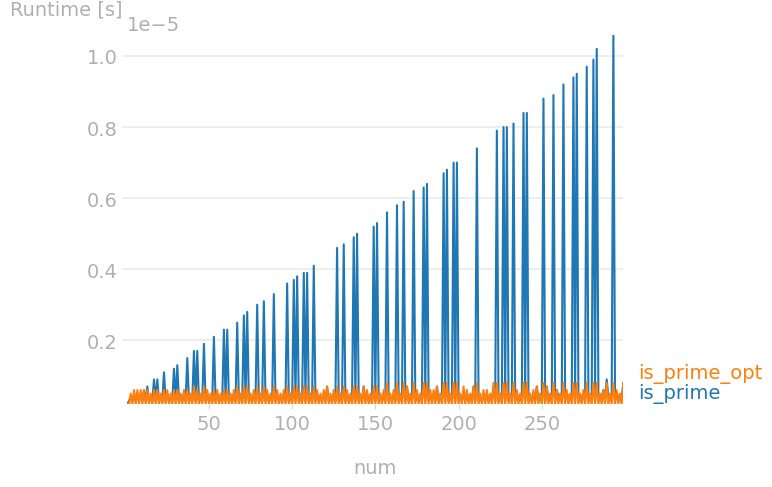

In [4]:
perfplot.show(
    setup = lambda n: n,
    n_range = [k for k in range(1, 300)],
    kernels=[is_prime, is_prime_opt],
    labels=["is_prime", "is_prime_opt"],
    xlabel="num",
    equality_check=None,
)

In [6]:
%%ipytest

def get_primes(num: int) -> list:
    primes = []
    primes_flag = [False, False] + [True] * (num - 2)
    square_root = math.ceil(math.sqrt(num))
    for p in range(2, square_root):
        if primes_flag[p]:
            primes.append(p)
            for i in range(p * p, num, p):
                primes_flag[i] = False
    for p in range(square_root, num):
        if primes_flag[p]:
            primes.append(p)
    return primes

@pytest.mark.parametrize("num, expected", [
    (10, [2, 3, 5, 7]),
    (20, [2, 3, 5, 7, 11, 13, 17, 19]),
    (30, [2, 3, 5, 7, 11, 13, 17, 19, 23, 29]),
])

def test_get_primes(num, expected):
    assert get_primes(num) == expected

...                                                                                          [100%]
3 passed in 0.02s


## コインの組み合わせ問題

In [11]:
for c1 in range(0, 12 + 1):
    for c2 in range(0, 9+1):
        for c3 in range(0, 30+1):
            total = c1  + c2 * 5 + c3 * 10

            if total == 325:
                print(f"10円玉: {c1:>2}枚, 5円玉: {c2:>2}枚, 1円玉: {c3:>2}枚")

10円玉:  0枚, 5円玉:  5枚, 1円玉: 30枚
10円玉:  0枚, 5円玉:  7枚, 1円玉: 29枚
10円玉:  0枚, 5円玉:  9枚, 1円玉: 28枚
10円玉:  5枚, 5円玉:  4枚, 1円玉: 30枚
10円玉:  5枚, 5円玉:  6枚, 1円玉: 29枚
10円玉:  5枚, 5円玉:  8枚, 1円玉: 28枚
10円玉: 10枚, 5円玉:  3枚, 1円玉: 30枚
10円玉: 10枚, 5円玉:  5枚, 1円玉: 29枚
10円玉: 10枚, 5円玉:  7枚, 1円玉: 28枚
10円玉: 10枚, 5円玉:  9枚, 1円玉: 27枚


## シーザー暗号

In [4]:
%%ipytest

def encrypt_caser(src: str, shift: int) -> str:
    dest = ""
    for char in src:
        if char.islower():
            dest += chr((ord(char) - ord("a") + shift) % 26 + ord("a"))
        elif char.isupper():
            dest += chr((ord(char) - ord("A") + shift) % 26 + ord("A"))
        else:
            dest += char
    return dest

def decrypt_caser(src: str, shift: int) -> str:
    return encrypt_caser(src, -shift)

@pytest.mark.parametrize("src, shift, expected", [
    ("abc", 1, "bcd"),
    ("abc", 2, "cde"),
    ("xyz", 1, "yza"),
    ("ABC", 1, "BCD"),
    ("ABC", 2, "CDE"),
    ("XYZ", 1, "YZA"),
    ("abc", 26, "abc"),
    ("abc", 27, "bcd"),
    ("abc", 52, "abc"),
    ("abc", 53, "bcd"),
])

def test_encrypt_caser(src, shift, expected):
    assert encrypt_caser(src, shift) == expected

..........                                                                                   [100%]
10 passed in 0.04s


## 上杉暗号

In [2]:
%%ipytest

KANSUJI = list("〇一二三四五六七八九")
ROMASUJI = list("0123456789")

KANSUJI_DIC = dict(zip(KANSUJI, ROMASUJI))

def to_kansuji(src: str) -> str:
    dest = ""
    for char in src:
        if char in ROMASUJI:
            dest += KANSUJI[int(char)]
        else:
            dest += char
    return dest

def to_romasuji(src: str) -> str:
    dest = ""
    for char in src:
        if char in KANSUJI:
            dest += KANSUJI_DIC[char]
        else:
            dest += char
    return dest

@pytest.mark.parametrize("src, expected", [
    ("一二三", "123"),
    ("四五六", "456"),
    ("七八九", "789"),
    ("一二三四五六七八九", "123456789"),
    ("〇一二三四五六七八九十", "0123456789十"),
])

def test_to_kansuji(src, expected):
    assert to_romasuji(src) == expected

.....                                                                                        [100%]
5 passed in 0.03s


In [3]:
CONV_TABLE = [
    list("いろはにほへと"),
    list("ちりぬるをわか"),
    list("よたれそつねな"),
    list("らむうゐのおく"),
    list("やまけふこえて"),
    list("あさきゆめみし"),
    list("ゑひもせすん〇"),
]

CONV_DIC = {}
for i, row in enumerate(CONV_TABLE):
    for j, char in enumerate(row):
        CONV_DIC[char] = f"{i+1}{j+1}" 

In [4]:
%%ipytest

def encrypt_uesugi(src: str) -> str:
    dest = ""
    for char in src:
        if char in CONV_DIC:
            dest += CONV_DIC[char]
        else:
            dest += char
    return to_kansuji(dest)

def decrypt_uesugi(src: str) -> str:
    dest = ""
    row, col = None, None
    for char in src:
        if char in "一二三四五六七八九":
            if row is None:
                row = int(to_romasuji(char)) - 1
            else:
                col = int(to_romasuji(char)) - 1
                dest += CONV_TABLE[row][col]
                row, col = None, None
        else:
            if row is not None:
                dest += to_kansuji(str(row + 1))
                row = None
            dest += char
    return dest

@pytest.mark.parametrize("src, expected", [
    ["しろくま", "六七一二四七五二"],

])

def test_encrypt_uesugi(src, expected):
    assert encrypt_uesugi(src) == expected


.                                                                                            [100%]
1 passed in 0.01s


In [6]:
CONV_TABLE = [
    list("いろはにほへと"),
    list("ちりぬるをわか"),
    list("よたれそつねな"),
    list("らむうゐのおく"),
    list("やまけふこえて"),
    list("あさきゆめみし"),
    list("ゑひもせすん〇"),
]

CONV_DIC = {}
for i, row in enumerate(CONV_TABLE):
    for j, char in enumerate(row):
        CONV_DIC[char] = CONV_TABLE[0][i] + CONV_TABLE[1][j]

In [7]:
%%ipytest

def encrypt_uesugi_iro(src: str) -> str:
    dest = ""
    for char in src:
        if char in CONV_DIC:
            dest += CONV_DIC[char]
        else:
            dest += char
    return dest

def decrypt_uesugi_iro(src: str) -> str:
    dest = ""
    row, col = None, None
    for char in src:
        if row is None:
            if char in CONV_TABLE[0]:
                row = CONV_TABLE[0].index(char)
        else:
            if char in CONV_TABLE[1]:
                col = CONV_TABLE[1].index(char)
                dest += CONV_TABLE[row][col]
                row, col = None, None
            else:
                dest += CONV_TABLE[0][row]
                dest += char
                row, col = None, None
    return dest
@pytest.mark.parametrize("src, expected", [
    ["にわとぬほかはかへかいぬにわほをにをへわほちへぬ", "おもてなしはおこのみやき"]
])

def test_decrypt_uesugi_iro(src, expected):
    assert decrypt_uesugi_iro(src) == expected

.                                                                                            [100%]
1 passed in 0.02s


## XOR暗号

In [9]:
%%ipytest

import binascii

def encrypt_xor(src: str, key: str) -> str:
    result = bytearray()
    str_bytes = src.encode()
    key_bytes = key.encode()
    for i in range(len(str_bytes)):
        result.append(str_bytes[i] ^ key_bytes[i % len(key_bytes)])
    return binascii.hexlify(result).decode('utf-8')

@pytest.mark.parametrize("src, key, expected", [
    ("world", "abc", "160d110d06")
])

def test_encrypt_xor(src, key, expected):
    assert encrypt_xor(src, key) == expected

.                                                                                            [100%]
1 passed in 0.03s


In [10]:
%%ipytest

def decrypt_xor(src: str, key: str) -> str:
    result = bytearray()
    str_bytes = binascii.unhexlify(src)
    key_bytes = key.encode()
    for i in range(len(str_bytes)):
        result.append(str_bytes[i] ^ key_bytes[i % len(key_bytes)])
    return result.decode('utf-8')

@pytest.mark.parametrize("src, key, expected", [
    ("160d110d06", "abc", "world")
])

def test_decrypt_xor(src, key, expected):
    assert decrypt_xor(src, key) == expected

.                                                                                            [100%]
1 passed in 0.02s


## カードのシャッフル

In [15]:
seed = 123

def fisher_yates_shuffle(arr: list) -> list:
    random.seed(seed)
    for i in range(len(arr) - 1, 0, -1):
        j = random.randint(0, i)
        arr[i], arr[j] = arr[j], arr[i]
    return arr

arr = [1, 2, 3, 4, 5]
print(arr)
print(fisher_yates_shuffle(arr))

[1, 2, 3, 4, 5]
[4, 2, 5, 3, 1]


In [18]:
MARKS = ["♥", "♦", "♠", "♣"]
NUMBERS = ["A", "2", "3", "4", "5", "6", "7", "8", "9", "10", "J", "Q", "K"]
CARDS = [f"{mark}{number}" for mark in MARKS for number in NUMBERS]

random.seed(seed)
random.shuffle(CARDS)
print(CARDS[:5])

['♠Q', '♣J', '♠4', '♣10', '♦8']


In [19]:
def get_card(no: int) -> str:
    mark = MARKS[no // 13]
    number = NUMBERS[no % 13]
    return f"{mark}{number}"

get_card(0)

'♥A'

In [20]:
arr = fisher_yates_shuffle(list(range(52)))
cards = [get_card(no) for no in arr]
print(cards[:5])

['♠Q', '♣J', '♠4', '♣10', '♦8']
